### Apply_kwargs()
It's an auxiliary function to apply common modifications to each plot in QuickVega. Here are a list of possible attirbutes (I'm trying to use similar notation to Plots.jl):
* color    - specify a single color for the whole plot (e.g color = "blue");
* zcolor   - this is for assigning a variable to color (e.g color = randn(100));
* size     - this is for assigning a variable to size  (e.g size  = randn(100));
* palette  - choose a color scheme;
* width
* height
* stroke   - true or false for the line across the image;
* opacity  - use a variable to be the opacity of the plot;
* marktype 
* marksize 
* markopacity 
* markstroke 
* markstrokewidth
* title
* xlabel
* ylabel
* grid
* gridx    - grid vertical true or false;
* gridy    - grid horizontal true or false;
* xscale   - example, allow log scale;
* yscale


Implement a Cheat_Sheet for the possible parameters;

In [3]:
using Revise, Pkg
Pkg.activate("../.")
using QuickVega, DataFrames, VegaLite, VegaDatasets
using Distributions, KernelDensity
using Contour
using Setfield
using VegaDatasets
using DataStructures
using DataTables

 Activating environment at `~/MEGAsync/EMAp/QuickVega.jl/Project.toml`
┌ Info: Precompiling QuickVega [8cbdc466-600a-49fa-b107-91fd9d936351]
└ @ Base loading.jl:1278
┌ Warning: Package QuickVega does not have DataFrames in its dependencies:
│ - If you have QuickVega checked out for development and have
│   added DataFrames as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with QuickVega
└ Loading DataFrames into QuickVega from project dependency, future warnings for QuickVega are suppressed.


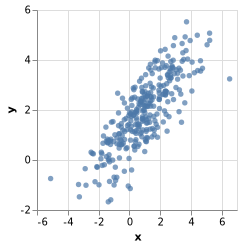

In [4]:
μ = [1.0,2.0]
Σ = [3.0 2.0;
     2.0 2.0]
d = Distributions.MultivariateNormal(μ,Σ)
samples = rand(d,300)';
data = DataTables.DataTable(x=samples[:,1],y=samples[:,2])
p = QuickVega.scatterplot(samples)

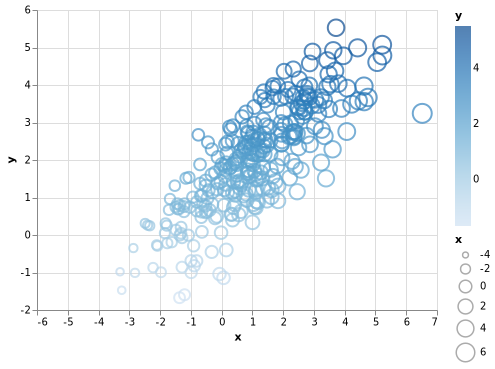

In [79]:
xp = vlfrag(field=:x,type=:q)
sp = vlfrag(field=:x,type=:q)
d = vlfrag()
vlplot(data=data, mark=:point,x=xp,y=:y,width=400,height=300,size=sp,color=:y)
# vlplot(mark=:point,x=randn(100),y=randn(100),width=400,height=300,color=rand(100),size=randn(100))
# vlplot(p)


In [40]:
function apply_kwargs_to_plot!(p;kwargs...)
    for (k,v) in kwargs
        eval(:(p = @set p.$k = $v))
    end
end


apply_kwargs_to_plot! (generic function with 1 method)

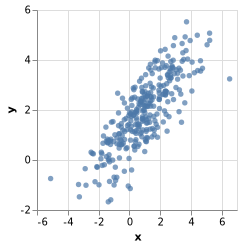

In [55]:
p = @set p.encoding.x.type = :q

In [241]:
apply_kwargs_to_plot!(p,width=500)#,height=500)

In [242]:
# colors = randn(300)
# @set p.encoding.color = "red"

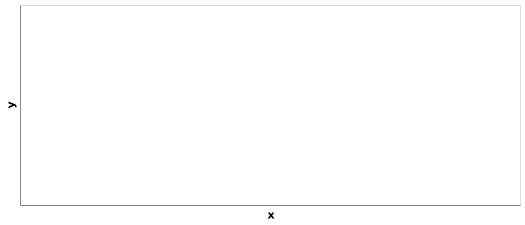

WARN Missing type for channel "x", using "quantitative" instead.
WARN Missing type for channel "y", using "quantitative" instead.
WARN Missing type for channel "x", using "quantitative" instead.
WARN Missing type for channel "y", using "quantitative" instead.


In [264]:
@vlfrag(:point,:x,:y,data=data).named["data"]
deletedata!(p)
@vl_str()

In [262]:
# @set p.encoding.color
p = @set p.encoding.color = Dict("valVegaLite"red")
@set p.data = data

@vlplot(
    mark="circle",
    encoding={
        x={
            field="x"
        },
        y={
            field="y"
        },
        color={
            value="red"
        }
    },
    width=500,
    data=[
        (x = -0.08415501071982812, y = 0.9881520298780699),
        (x = 2.5867465041222104, y = 3.6201913494704496),
        (x = 2.267780496280009, y = 3.8319673322704135),
        (x = 1.4459526088468084, y = 3.626590105923641),
        (x = 1.0209254840208026, y = 2.5194497039215067),
        (x = -0.4044493161806282, y = 0.01704400755230262),
        (x = 1.5499028070599299, y = 3.032051557124073),
        (x = 1.5413718444328326, y = 3.1254272641880987),
        (x = 2.2640554000184467, y = 3.302836420226024),
        (x = -2.4078464486569855, y = -0.29584460979563953),
        (x = 2.636414119937017, y = 2.931154939182031),
        (x = 3.811155209485936, y = 2.981599182350063),
        (x = 1.6130927573091507, y = 2.885520205958849),
        (x = -0.780766405396351,

In [238]:
p

Vega.DataValuesNode(OrderedDict{Symbol,AbstractArray{T,1} where T}(:x => [-0.08415501071982812, 2.5867465041222104, 2.267780496280009, 1.4459526088468084, 1.0209254840208026, -0.4044493161806282, 1.5499028070599299, 1.5413718444328326, 2.2640554000184467, -2.4078464486569855  …  3.080474276479775, 0.3055824708058694, 3.305678701268194, -2.3910046533994986, 4.07688989634646, 2.2640386547615954, 0.7109363438923119, -0.37710680114536643, -1.5914514741719659, 1.6423525238053023],:y => [0.9881520298780699, 3.6201913494704496, 3.8319673322704135, 3.626590105923641, 2.5194497039215067, 0.01704400755230262, 3.032051557124073, 3.1254272641880987, 3.302836420226024, -0.29584460979563953  …  4.444011382809636, 3.0558614215277156, 5.280565959216696, -0.8688736350692463, 3.168841280488249, 3.456017562477579, 1.016787242690717, 0.8698804585949824, 1.945047096711558, 1.668667089263641]))